In [1]:
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as ppt
%matplotlib inline

import caffe
import adex.googlenet

CAFFE_ROOT = '/home/chrisbot/Projects/caffe'
DATA_ROOT = '/media/sf_Masterarbeit/data/ILSVRC2012_img_train'
AE_ROOT = '/media/sf_Masterarbeit/data/ILSVRC2012_img_train_AE_50'

BATCH_SIZE = 1
net = adex.googlenet.load_model(CAFFE_ROOT, BATCH_SIZE)
transformer = adex.googlenet.build_transformer(net)

In [2]:
differences = []
for origin_image_name in glob.glob(AE_ROOT + '/*/'):
    origin_image_name = origin_image_name[:-1].split('/')[-1]
    origin_class = origin_image_name.split('_')[0]
    
    origin_image_path = DATA_ROOT + '/' + origin_class + '/' + origin_image_name + '.JPEG'
    origin_image = caffe.io.load_image(origin_image_path)
    origin_image = transformer.preprocess('data', origin_image)
    
    differences.append(np.zeros_like(origin_image))
    
    for target_class in glob.glob(AE_ROOT + '/' + origin_image_name + '/*'):
        target_class = target_class.split('/')[-1][:-4]
        target_image = np.load(AE_ROOT + '/' + origin_image_name + '/' + target_class + '.npy')
        target_image = target_image[0]
        
        differences[-1] += np.abs(origin_image - target_image)
    
    differences[-1] /= len(glob.glob(AE_ROOT + '/' + origin_image_name + '/*'))
    sys.stdout.write('.')
    sys.stdout.flush()

mean_difference = differences[0]
for diff in differences[1:]:
    mean_difference += diff
mean_difference /= len(differences)

..................................................

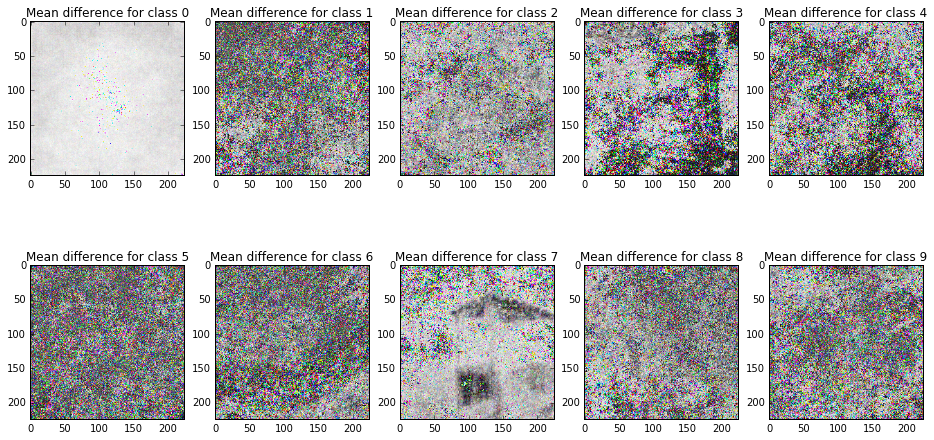

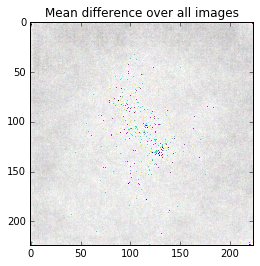

In [15]:
differences_deprocessed = [transformer.deprocess('data', d_image) for d_image in differences]
mean_difference_deprocessed = transformer.deprocess('data', mean_difference)

ppt.figure(figsize=(16, 8))
for index, d_image in enumerate(differences_deprocessed[0:10]):
    ax = ppt.subplot(2, 5, index+1)
    ppt.imshow(np.log(d_image))
    ppt.title('Mean difference for class {0}'.format(index))

ppt.figure()
ppt.imshow(np.log(mean_difference_deprocessed))
ppt.title('Mean difference over all images')